# 패션 의류 분류 경진대회

## 1. 데이터 살펴보기

### 1) 라이브러리 불러오기

In [1]:
# 데이터분석 및 시각화
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# 이미지 분석
from sklearn.model_selection import train_test_split
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Conv2D,MaxPooling2D,Dense,Flatten
from keras.optimizers import Adam
from keras.callbacks import TensorBoard

***

### 2) 데이터 불러오기

In [2]:
# 파일을 먼저 열어서 구조 확인하는 것도 나쁘지 않을 듯
train = pd.read_csv("C:/python/train2.csv", index_col='index')
test = pd.read_csv("C:/python/test2.csv", index_col='index')
submission = pd.read_csv("C:/python/sample_submission.csv", index_col='index') 

In [3]:
train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
index,,,,,,,,,,,,,,,,,,,,,
0,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,6,0,0,0,0,0,0,0,5,0,...,0,0,0,30,43,0,0,0,0,0
3,0,0,0,0,1,2,0,0,0,0,...,3,0,0,0,0,1,0,0,0,0
4,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
index,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,9,8,0,...,103,87,56,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,34,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,14,53,99,17,...,0,0,0,0,63,53,31,0,0,0
3,0,0,0,0,0,0,0,0,0,161,...,137,126,140,0,133,224,222,56,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
print(train.shape)

(60000, 785)


***

### 3) 데이터 시각화

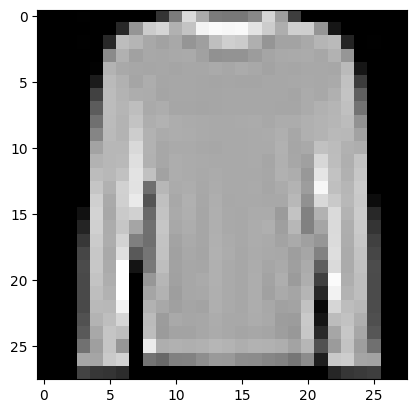

In [6]:
img = np.array(train.iloc[81,1:], dtype='float32').reshape((28,28))
# np.array로 배열 생성 후, reshape이라는 함수로 행렬 data 만들기
plt.imshow(img, cmap='gray') # cmap = 'gray'를 통해 흑백옵션 설정
plt.show()

[pyplot.imshow](https://pyvisuall.tistory.com/78) .. 자세히 알아보기

df.loc[0] ; 인덱스 이름이 0인 행 추출  
df.iloc[0] : 0번째 행 추출

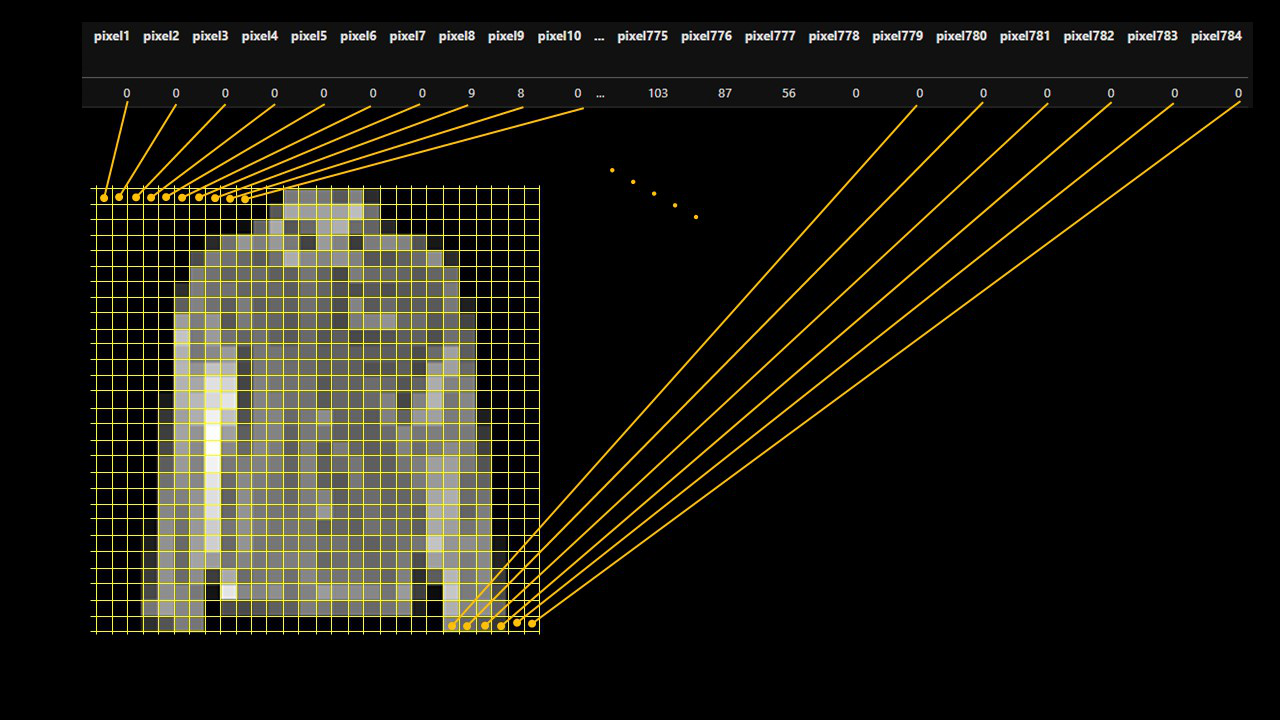

의류 이미지는 가로28 X 세로28 pixel

***

## 2. 데이터 분석하기

CNN(Convolutional Neural Network)를 주로 사용

### 1) 데이터 전처리

In [7]:
# 데이터 다시 불러오기
train = pd.read_csv('C:/python/train2.csv')
test = pd.read_csv('C:/python/test2.csv')

In [8]:
train_data = np.array(train.iloc[:,1:], dtype = 'float32')
test_data = np.array(test.iloc[:,1:], dtype='float32')

In [9]:
# Normalize.. 0과 1 사이 수로 만들기
x_train = train_data[:,1:]/255
y_train = train_data[:,0] 
x_test= test_data/255

In [10]:
# x_train.shape

In [11]:
# x_test.shape

In [12]:
y_train # Each label is an integer between 0 and 9

array([2., 9., 6., ..., 8., 8., 7.], dtype=float32)

In [13]:
x_train,x_validate,y_train,y_validate = train_test_split(x_train,y_train,test_size = 0.2,random_state = 12345)

In [14]:
x_train = x_train.reshape(x_train.shape[0],28,28,1) # shape[0] : 행의 갯수
x_test = x_test.reshape(x_test.shape[0],28,28,1)
x_validate = x_validate.reshape(x_validate.shape[0],28,28,1)

---

### 2) CNN 모델 생성

In [15]:
cnn_model = Sequential([
    Conv2D(filters=32,kernel_size=3,activation = 'relu',input_shape = (28,28,1)),
    MaxPooling2D(pool_size=2),
    Flatten(), # 1차원 형태의 배열로 변환
    Dense(32,activation = 'relu'), # First Layer : Input image를 받는 뉴런의 역할
    Dense(10,activation = 'softmax') # Output(create the probability dist that seems to 1)
]) 

In [16]:
cnn_model.compile(loss ='sparse_categorical_crossentropy', optimizer=Adam(lr=0.001),metrics =['accuracy'])

C:\anaconda\envs\pybook\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:117: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super().__init__(name, **kwargs)


### Loss
measures how accurate the model is during training(minimize)
### Optimizer
how the model is updated based on the data it sees and its loss function
### Metrics
used to monitor the training and testing steps

---

### 3) 모델 학습 및 예측

In [17]:
history = cnn_model.fit(
    x_train,
    y_train,
    batch_size=512,
    epochs=20,
    verbose=1,
    validation_data=(x_validate,y_validate),
)
# model.fit(train_images, train_lablels, epochs=5)

Epoch 1/20
94/94 [==============================] - 13s 125ms/step - loss: 0.8333 - accuracy: 0.7255 - val_loss: 0.5169 - val_accuracy: 0.8126
Epoch 2/20
94/94 [==============================] - 11s 121ms/step - loss: 0.4554 - accuracy: 0.8410 - val_loss: 0.4160 - val_accuracy: 0.8555
Epoch 3/20
94/94 [==============================] - 11s 120ms/step - loss: 0.3914 - accuracy: 0.8646 - val_loss: 0.3701 - val_accuracy: 0.8713
Epoch 4/20
94/94 [==============================] - 11s 121ms/step - loss: 0.3586 - accuracy: 0.8759 - val_loss: 0.3530 - val_accuracy: 0.8759
Epoch 5/20
94/94 [==============================] - 11s 119ms/step - loss: 0.3366 - accuracy: 0.8822 - val_loss: 0.3315 - val_accuracy: 0.8854
Epoch 6/20
94/94 [==============================] - 11s 121ms/step - loss: 0.3140 - accuracy: 0.8914 - val_loss: 0.3242 - val_accuracy: 0.8852
Epoch 7/20
94/94 [==============================] - 11s 122ms/step - loss: 0.3060 - accuracy: 0.8930 - val_loss: 0.3147 - val_accuracy: 0.8894

In [18]:
# 예측
y_pred = cnn_model.predict(x_test)

313/313 [==============================] - 2s 6ms/step


In [19]:
y_pred[0]

array([9.9345016e-01, 6.0124258e-08, 1.1559908e-04, 9.1411261e-05,
       2.2260334e-05, 2.6479291e-10, 5.9685847e-03, 2.5775588e-09,
       3.5201304e-04, 2.0510335e-10], dtype=float32)

In [20]:
np.argmax(y_pred[0]) # highest confidence value.. t-shirt!

0

---

In [21]:
# 저장
submission = pd.read_csv('C:/python/sample_submission.csv', encoding = 'utf-8')
submission['label'] = y_pred
submission.to_csv('fashion_submission.csv', index = False)